## Técnica de regularización de redes neuronales: Dropout 

Las redes neuronales tienen la capacidad de aprender patrones complejos en los datos de entrenamiento, lo que les permite ajustarse y abordar problemas difíciles. Sin embargo, cuando se sobreajustan, se vuelven demasiado especializadas en los datos específicos de entrenamiento y pierden la capacidad de generalizar a datos nuevos. 
El sobreajuste se produce cuando el modelo captura características irrelevantes o ruido del conjunto de entrenamiento, en lugar de aprender los patrones fundamentales y generalizabl, lo queto puede llevar a una mala capacidad predictiva del modelo en datos nuevos y no vistos durante el entrenamiento.

La regularización en las redes neuronales es un conjunto de técnicas utilizadas para prevenir el sobreajuste y mejorar la capacidad de generalización del mod .  
Al aplicar técnicas de regularización, se controla la complejidad del modelo y se evita que los pesos y parámetros se vuelvan demasiado grandes o especializados en los datos de entrenamiento. Esto permite que la red neuronal generalize mejor y mejore el rendimiento en datos nuevos y no vistos. La regularización también proporciona una forma de lidiar con la alta dimensionalidad y complejidad de los modelos de aprendizaje profundo.

Existen diversas técnicas de regularización que ayudan a controlar la complejidad del modelo y a optimizar el rendimiento en datos nuevos. Algunas de estas son la regularización L1 y L2, el decaimiento de pesos, el dropout, la normalización por lotes, el aumento de datos y la parada tem
prana. Nos centraremos en la técnica conocida como Dropout.

El dropout es una técnica de regularización que suele trabajar mejor con redes neuronales grandes. La técnica se basa en eliminar aleatoriamente un porcentaje de neuronas, elegidas mediante cierta probabilidad, durante el entrenamiento de la red neuronal. Esto evita que el modelo se vuelva dependiente de un conjunto específico de características al hacer que cada neurona tenga que aprender de manera más independiente.

Es importante destacar que la técnica de dropout sólo se utiliza en la fase de entrenamiento del modelo. Establece una probabilidad en cada neurona que determina si ella es incluida o no allí. Sólo van a actualizarse los parámetros de los nodos que estén estuvieron presentes en esta fase, con el objetivo de que el entrenamiento se realice sobre una red neuronal con una menor cantidad de neuronas, lo que dará menos margen de flexibilidad, y por lo tanto la probabilidad de que ella se sobreajuste será

Veamos una posible implementación de la técnica de dropout en Tensorflow inferior. 

### Implementación de Dropout en Tensorflow y Keras

Crearemos un modelo para clasificar imágenes del conjunto de datos MNIST, que consiste en dígitos escritos a mano. 

In [1]:
#Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Cargamos y preparamos los datos del conjunto MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convertimos los datos de píxeles (0-255) a float32 y los normalizamos a un rango de
# 0 a 1 dividiendo por 255. Esto ayuda a la convergencia del modelo.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Cambiamos la forma de los datos a (número de ejemplos, alto, ancho, canales). Aquí
# estamos indicando que cada imagen es de 28x28 píxeles y tiene un solo canal 
# (escala de grises).
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encoding de las etiquetas:  Convierte las etiquetas de dígitos (0-9) a un
#formato one-hot, donde cada etiqueta se representa como un vector binario.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# Creamos un modelo básico sin Dropout
def create_model_no_dropout():
    model = models.Sequential() # Crea un modelo secuencial, donde las capas se apilan una tras otra.
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # Capa convolucional con 32 filtros de tamaño 3x3. activation='relu' aplica la función de activación ReLU. input_shape=(28, 28, 1) especifica la forma de entrada de las imágenes.
    model.add(layers.MaxPooling2D((2, 2))) # Capa de pooling que reduce la dimensión de la entrada tomando el máximo en una ventana de 2x2, lo que ayuda a reducir la complejidad y el riesgo de sobreajuste.
    model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Otra capa convolucional, pero esta vez con 64 filtros.
    model.add(layers.MaxPooling2D((2, 2))) # Otro pooling para reducir aún más la dimensionalidad.
    model.add(layers.Flatten()) # Flatten(): Convierte la salida de las capas anteriores (que son 3D) en un vector 1D para que pueda ser alimentado a una capa densa.
    model.add(layers.Dense(64, activation='relu')) # Capa densa con 64 neuronas y función de activación ReLU.
    model.add(layers.Dense(10, activation='softmax')) # Capa de salida con 10 neuronas (una por cada dígito) y activación softmax, que convierte las salidas en probabilidades.
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Configura el modelo para el entrenamiento. optimizer='adam' es un optimizador que ajusta el learning rate automáticamente. loss='categorical_crossentropy' es la función de pérdida adecuada para clasificación multiclase.
    return model

model_no_dropout = create_model_no_dropout()
history_no_dropout = model_no_dropout.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2) # Entrena el modelo. epochs=5 indica cuántas veces pasaremos por todo el conjunto de datos. batch_size=64 define cuántos ejemplos procesar en cada paso. validation_split=0.2 usa el 20% de los datos de entrenamiento para validación.

Epoch 1/5
750/750 [==============================] - 13s 16ms/step - loss: 0.2040 - accuracy: 0.9393 - val_loss: 0.0715 - val_accuracy: 0.9797
Epoch 2/5
750/750 [==============================] - 10s 14ms/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.0541 - val_accuracy: 0.9844
Epoch 3/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0447 - val_accuracy: 0.9866
Epoch 4/5
750/750 [==============================] - 11s 14ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.0519 - val_accuracy: 0.9855
Epoch 5/5
750/750 [==============================] - 11s 14ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0421 - val_accuracy: 0.9885


In [4]:
#Creamos un modelo similar al anterior pero con capas de Dropout
def create_model_with_dropout():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))  # Aplica Dropout con una tasa del 50%. Esto significa que durante el entrenamiento, el 50% de las neuronas de esta capa se desactivan aleatoriamente en cada iteración, lo que ayuda a prevenir el sobreajuste.
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_with_dropout = create_model_with_dropout()
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 12s 15ms/step - loss: 0.3953 - accuracy: 0.8761 - val_loss: 0.0901 - val_accuracy: 0.9729
Epoch 2/5
750/750 [==============================] - 10s 14ms/step - loss: 0.1510 - accuracy: 0.9565 - val_loss: 0.0565 - val_accuracy: 0.9837
Epoch 3/5
750/750 [==============================] - 10s 13ms/step - loss: 0.1103 - accuracy: 0.9669 - val_loss: 0.0466 - val_accuracy: 0.9859
Epoch 4/5
750/750 [==============================] - 11s 15ms/step - loss: 0.0910 - accuracy: 0.9730 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 5/5
750/750 [==============================] - 10s 14ms/step - loss: 0.0781 - accuracy: 0.9765 - val_loss: 0.0390 - val_accuracy: 0.9892


### Gráficas comparativas
Tenemos dos gráficos que nos ayudarán a comparar lo que ocurre cuando un modelo es regularizado mediante dropout, y cuando no.

En el primer gráfico observamos el accuracy del modelo:
- Eje Y (vertical): Representa la precisión del modelo, que indica la proporción de predicciones correctas sobre el total de predicciones realizadas.
- Eje X (horizontal): Representa el número de épocas (epochs), que son las iteraciones completas sobre el conjunto de entrenamiento.
- Curvas:
    - Sin Dropout: Muestra cómo la precisión del modelo sin regularización aumenta a medida que avanzan las épocas.
    - Con Dropout: Muestra la precisión del modelo que incluye Dropout. Generalmente, esta curva puede ser más estable y menos propensa a sobreajustar.
 
En el segundo gráfico observamos el loss del modelo:
- Eje Y (vertical): Representa la pérdida del modelo, que indica cuán lejos están las predicciones del modelo de las etiquetas reales. Una pérdida más baja indica un mejor rendimiento.
- Eje X (horizontal): También representa el número de épocas.
- Curvas:
    - Sin Dropout: Refleja la pérdida del modelo sin regularización a lo largo del entrenamiento.
    - Con Dropout: Muestra la pérdida del modelo con Dropout. Esta curva suele descender de manera más controlada, sugiriendo que el modelo está aprendiendo de forma más efectiva sin caer en el sobreajuste.

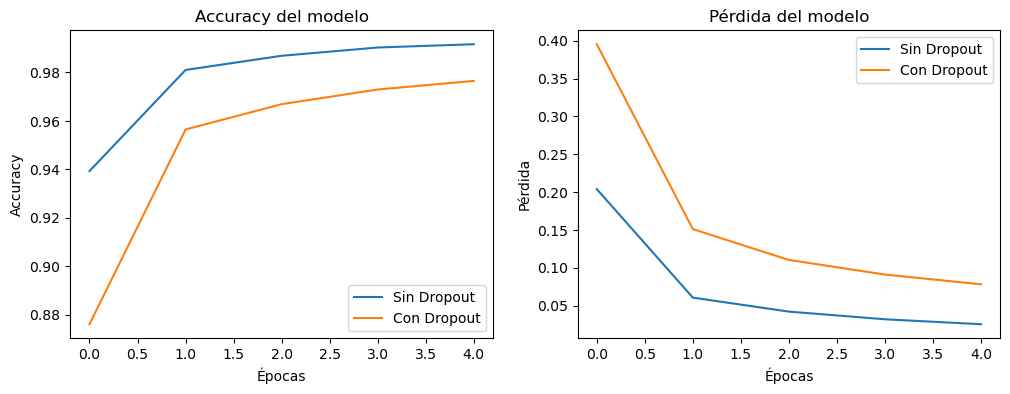

In [5]:
# Graficamos los resultados de ambos modelos

def plot_history(history_no_dropout, history_with_dropout):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_no_dropout.history['accuracy'], label='Sin Dropout')
    plt.plot(history_with_dropout.history['accuracy'], label='Con Dropout')
    plt.title('Accuracy del modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history_no_dropout.history['loss'], label='Sin Dropout')
    plt.plot(history_with_dropout.history['loss'], label='Con Dropout')
    plt.title('Pérdida del modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()

plot_history(history_no_dropout, history_with_dropout)